In [1]:
#Set up DrWatson
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
# Load relevant fuctions
include("/home/jm2386/Active_Lattice/src/pm_pde_functions.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");
include("/home/jm2386/Active_Lattice/src/plot_functions.jl");

loaded


In [2]:
# set parameters
Pe = 7.5
pert = "pm_lin_binod"
    T = 0.5
    save_interval = 0.001
    δ  = 1e-3
    Dx = 1. 
    Dθ = 400.0
    Nx = 2^10
    Nθ = 2
    δt = 1e-7
#
#load binodal values
name = "pm_pde_binodal_run_δ=$(δ)_l=$(1/sqrt(Dθ))"
#
filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
data = wload(filename)
@unpack Pe, γs, ϕ1s, ϕ2s, average_ϕs, χs = data
#create params
params = []
# set parameters
params = []
Pe = 7.5
name = "pm_pde_binodal+pert_run_δ=$(δ)_l=$(1/sqrt(Dθ))"
pert = "pm_lin_binod"
    T = 1.0
    save_interval = 0.001
    δ  = 1e-3
    Dx = 1. 
    Dθ = 400.0
    Nx = 2^10
    Nθ = 2
    δt = 1e-7
#
#load binodal values
filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
    data = wload(filename)
    @unpack Pe, γs, ϕ1s, ϕ2s, average_ϕs, χs = data
#create params
params = []
    γ_length = length(γs)
    n_lines = 40
    interval = Int(round(γ_length/n_lines))
    γs          = γs[interval:(2*interval):Int64(round(γ_length))]
    γs = [γ for γ in γs if γ ≤ 2.2]
    average_ϕs  = average_ϕs[interval:(interval):Int64(round(γ_length))]
    γ_length = length(γs)
    average_ϕs = average_ϕs[1:γ_length]
map(average_ϕs, γs) do ρ, γ
        χ = (1-γ*(1-ρ))/ρ
        param = pde_param_pm(; name = name, 
                                ρ = ρ, Pe = Pe, χ = χ, T = T, 
                                Dθ = Dθ, δt = δt, Nx = Nx, Nθ = Nθ, 
                                save_interval = save_interval, max_steps = 1e9,
                                pert = pert, δ = δ,
        )
        push!(params,param)
end
#add extra wavy one
ϕa = 0.5
ϕp = 0.3
param = pde_param_pm(; name = name, 
    ρ = ϕa+ϕp, Pe = Pe, χ = ϕa/(ϕa+ϕp), T = T, 
    Dθ = Dθ, δt = δt, Nx = Nx, Nθ = Nθ, 
    save_interval = save_interval, max_steps = 1e9,
    pert = pert, δ = δ,
)
push!(params,param)

16-element Vector{Any}:
 Dict{String, Any}("λs" => 20.0:20.0:100.0, "T" => 1.0, "video_length" => 10000.0, "save_interval" => 0.001, "max_runs" => 6, "Pe" => 7.5, "λ_step" => 10.0, "δ" => 0.001, "Nθ" => 2, "name" => "pm_pde_binodal+pert_run_δ=0.001_l=0.05"…)
 Dict{String, Any}("λs" => 20.0:20.0:100.0, "T" => 1.0, "video_length" => 10000.0, "save_interval" => 0.001, "max_runs" => 6, "Pe" => 7.5, "λ_step" => 10.0, "δ" => 0.001, "Nθ" => 2, "name" => "pm_pde_binodal+pert_run_δ=0.001_l=0.05"…)
 Dict{String, Any}("λs" => 20.0:20.0:100.0, "T" => 1.0, "video_length" => 10000.0, "save_interval" => 0.001, "max_runs" => 6, "Pe" => 7.5, "λ_step" => 10.0, "δ" => 0.001, "Nθ" => 2, "name" => "pm_pde_binodal+pert_run_δ=0.001_l=0.05"…)
 Dict{String, Any}("λs" => 20.0:20.0:100.0, "T" => 1.0, "video_length" => 10000.0, "save_interval" => 0.001, "max_runs" => 6, "Pe" => 7.5, "λ_step" => 10.0, "δ" => 0.001, "Nθ" => 2, "name" => "pm_pde_binodal+pert_run_δ=0.001_l=0.05"…)
 Dict{String, Any}("λs" => 20.0:20.0

In [13]:
#load binodal
filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
data = wload(filename)
@unpack Pe, γs, ϕ1s, ϕ2s, average_ϕs, χs = data

#plot binodal
using PyPlot
PyPlot.close("all")
rc("text", usetex=true)
fig, ax = plt.subplots(1, 1, figsize=(10,10))
binod = ax.plot(gammas_converter_a(γs, ϕ1s), gammas_converter_p(γs, ϕ1s), color = "red", label = "Binodal")
ax.plot(gammas_converter_a(γs, ϕ2s), gammas_converter_p(γs, ϕ2s), color = "red", label = "_Bindoal")
ax.plot(0.:0.1:1., 1.:-0.1:0., color = "black", label = "_Full")

#plot tie lines
# γ_length = length(γs)
# n_lines = 40
# interval = Int(round(γ_length/n_lines))
# Δx = 0.001

# x_values = -collect( ϕ1s[interval]:Δx:ϕ2s[interval] ).+1
# γ = γs[interval]
# ax.plot(-γ*x_values.+1, (γ-1)*x_values, color = "gray", label = "Tie line")
# for i in (3*interval):(2*interval):Int64(round(γ_length))
#     γ = γs[i]
#     ϕa, ϕp = gamma_converter(γ, ϕ1s[i])
#     stable1 = is_stable_value(ϕa, ϕp; Pe = Pe)
#     ϕa, ϕp = gamma_converter(γ, ϕ2s[i])
#     stable2  = is_stable_value(ϕa, ϕp; Pe = Pe)
#     stable = (stable1<0)&(stable2<0)
#     x = -collect(ϕ1s[i]:Δx:ϕ2s[i]).+1
#     if stable
#         colour = "gray"
#     else
#         colour = "black"
#     end
#     ax.plot(-γ*x.+1, (γ-1)*x, color = colour, label = "_cloud line")
# end

#plot spinodal
ϕas = collect(0.0001:0.0001:0.999)
    ϕa_sols, low_ϕps, high_ϕps = return_complex_boundary_outer(ϕas; Pe = Pe)
    n = length([x for x in ϕa_sols if x < 0.42])
    N = length(ϕa_sols)
    ax.plot(ϕa_sols[1:n], low_ϕps[1:n], color = "green", label = "Complex")
    ax.plot(ϕa_sols[1:n], high_ϕps[1:n], color = "green", label = "_Complex")
    ax.plot(ϕa_sols[(n+1):1:N], low_ϕps[(n+1):1:N], color = "green", label = "_Complex")
    ax.plot(ϕa_sols[(n+1):1:N], high_ϕps[(n+1):1:N], color = "green", label = "_Complex")


    ϕa_sols, low_ϕps1, high_ϕps1, low_ϕps2, high_ϕps2 = return_complex_boundary_inner(ϕas; Pe = Pe)
    ax.plot(ϕa_sols, low_ϕps1, color = "green", label = "_Complex")
    ax.plot(ϕa_sols, high_ϕps1, color = "green", label = "_Complex")
    ax.plot(ϕa_sols, low_ϕps2, color = "green", label = "_Complex")
    ax.plot(ϕa_sols, high_ϕps2, color = "green", label = "_Complex")
    
    ϕa_low, ϕa_high, low_ϕps2, high_ϕps2 = return_stable_boundary(ϕas; Pe = Pe)
    ax.plot(ϕa_low, low_ϕps2, color = "blue", label = "Spinodal")
    ax.plot(ϕa_high, high_ϕps2, color = "blue", label = "_Spindoal")

    ϕa_low, ϕa_mid, ϕa_high, low_ϕps, mid_ϕps, high_ϕps = return_stable_boundary_extra(ϕas; Pe = Pe)
    ax.plot(ϕa_low, low_ϕps, color = "blue", label = "_Spinodal")
    ax.plot(ϕa_high, high_ϕps, color = "blue", label = "_Spindoal")
ax.plot(ϕa_mid, mid_ϕps, color = "blue", label = "_Spindoal")


rc("text", usetex=true)
    #ax.yaxis.set_ticks(ytic)
    axlim = [0, 1, 0, 1]
    #axlim = [0.4, 0.45, 0, 0.1]
    ax.xaxis.set_tick_params(labelsize=15)
    ax.xaxis.tick_bottom()
    ax.yaxis.set_tick_params(labelsize=15)
    ax.axis(axlim)
    #ax.set_title(L"\Re{ \lambda_n^\mathrm{max}} = 0",fontsize=20)
    ax.set_xlabel(L"\phi^a",fontsize=20)
    ax.set_ylabel(L"\phi^p", fontsize=20)
    ax.legend(loc = "upper right", fontsize=20)
    #ax.set_aspect(0.25*Δρ/ΔPe)
    title = latexstring("\$ \\mathrm{Pe} = $(Pe)\$")
    ax.set_title(title,fontsize=20)
    fig.tight_layout()




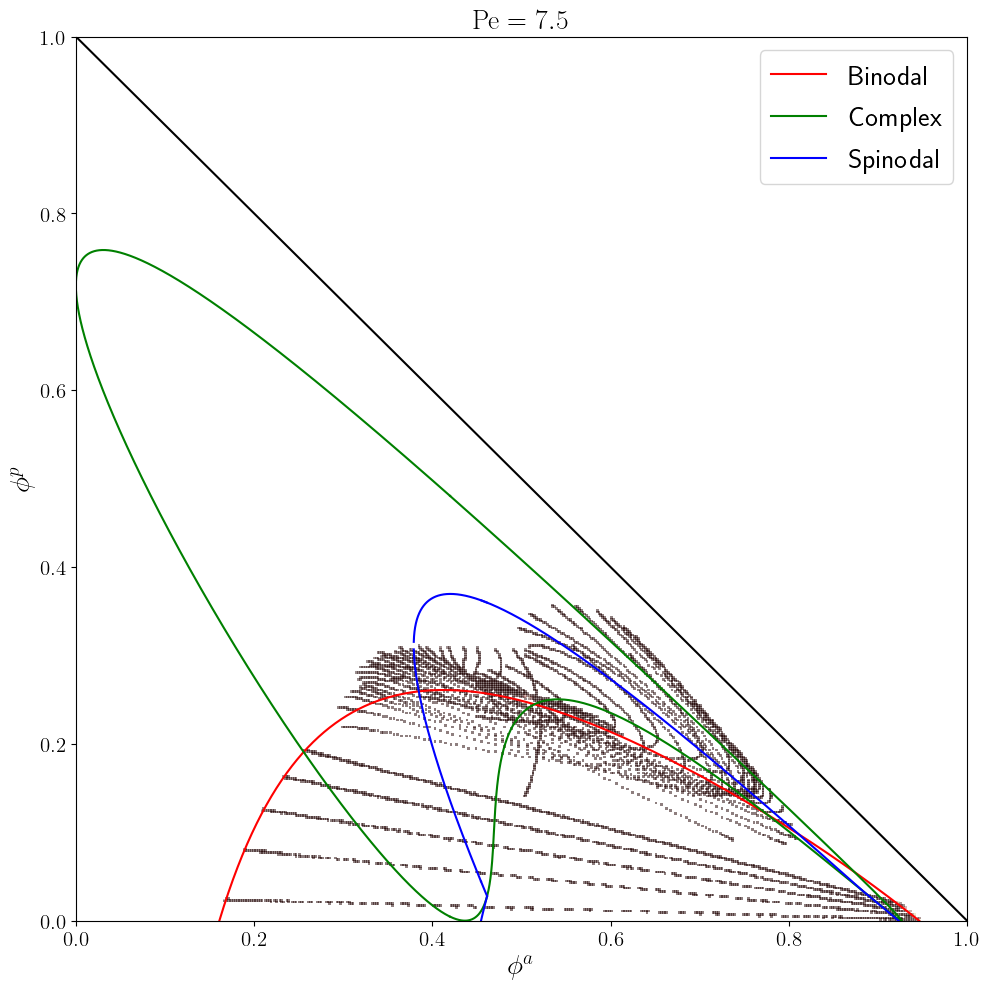

In [14]:
for param in params[1:2:10]
    #load pde
    # i = 10
    # param = params[i]

    @unpack save_interval, T, ρa, ρp = param
    T = 1.0
    save_interval = 0.01
    t_saves, fa_saves, fp_saves = load_pdes_pm( param,T; save_interval = save_interval);
    
    # plot densty curve
    # n = length(t_saves)
    # t, fa, fp = t_saves[n], fa_saves[n], fp_saves[n];
    # ρa = fa[:,1]+fa[:,2];
    # ax.plot(ρa,fp, color = "black", label = "Tie line", linestyle = ":")

    #plot heatmap of denstiies
    fps = vcat(fp_saves...)
    ρas = []
    for fa in fa_saves
        append!(ρas, fa[:,1]+fa[:,2])
    end

    hist = ax.hist2d(ρas, fps, 
        bins= 500, cmap="pink", alpha=0.5, cmin = 1, range = [0 1;0 1], #vmin = 0, vmax = 1
    )


end
display(fig)

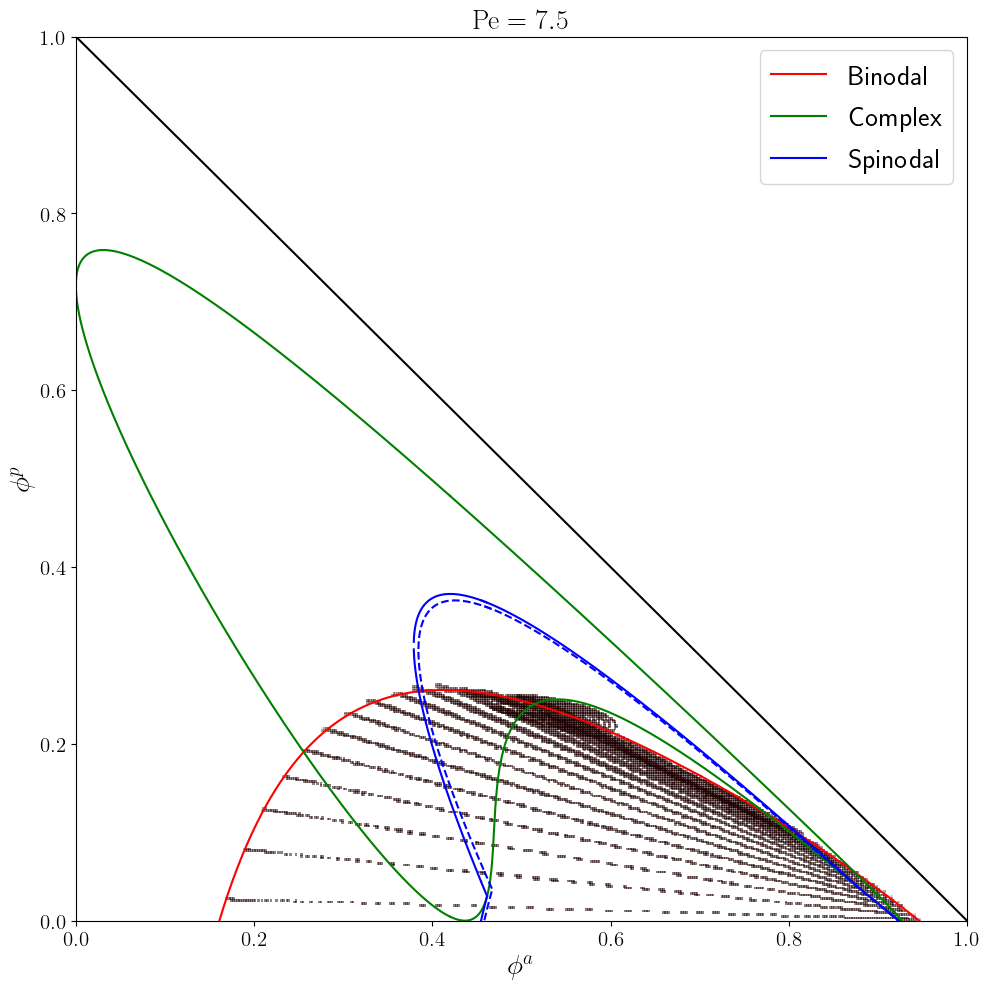

In [70]:
ϕas = collect(0.0001:0.0001:0.999) 
    ϕa_low, ϕa_high, low_ϕps2, high_ϕps2 = return_finite_stable_boundary(ϕas; Pe = Pe, Dθ = Dθ/4)
    ax.plot(ϕa_low, low_ϕps2, color = "blue", label = "_Spinodal", linestyle = "dashed")
    ax.plot(ϕa_high, high_ϕps2, color = "blue", label = "_Spindoal", linestyle = "dashed")

    ϕa_lowx, ϕa_mid, ϕa_highx, low_ϕps, mid_ϕps, high_ϕps = return_finite_stable_boundary_extra(ϕas; Pe = Pe, Dθ = Dθ/4)
    ax.plot(ϕa_lowx, low_ϕps, color = "blue", label = "_Spinodal", linestyle = "dashed")
    ax.plot(ϕa_highx, high_ϕps, color = "blue", label = "_Spindoal", linestyle = "dashed")
ax.plot(ϕa_mid, mid_ϕps, color = "blue", label = "_Spindoal", linestyle = "dashed")

display(fig)

In [15]:
i = 6
param = params[i]
γ = γs[i]

initial_Δ = 1e-4;
max_iter = 40;
tol = 1e-15;
atol = 1e-12;
rho_max = (1-10e-20);

find_sol, lower_limits, upper_limits = colapse_sol_interval(;Pe = Pe, γ = γ, rho_max = rho_max, initial_Δ = initial_Δ, max_iter = max_iter, tol = tol, atol = atol);
ϕg = lower_limits[1]
ϕl = upper_limits[1]

make_phase_video_pm(param; skip_factor = 10, ϕg =ϕg, ϕl = ϕl, start_time = 0.0)


In [8]:
i = 16
param = params[i]
@unpack ρa, ρp = param
γ = (1-ρa)/(1-ρp-ρa)

initial_Δ = 1e-4;
max_iter = 40;
tol = 1e-15;
atol = 1e-12;
rho_max = (1-10e-20);
ϕl = 1.
ϕg = 0.
try
    find_sol, lower_limits, upper_limits = colapse_sol_interval(;Pe = Pe, γ = γ, rho_max = rho_max, initial_Δ = initial_Δ, max_iter = max_iter, tol = tol, atol = atol);
    ϕg = lower_limits[1]
    ϕl = upper_limits[1]
catch
end

make_phase_video_pm(param; skip_factor = 1, ϕg =ϕg, ϕl = ϕl, start_time = 0.0)


no turn in g0


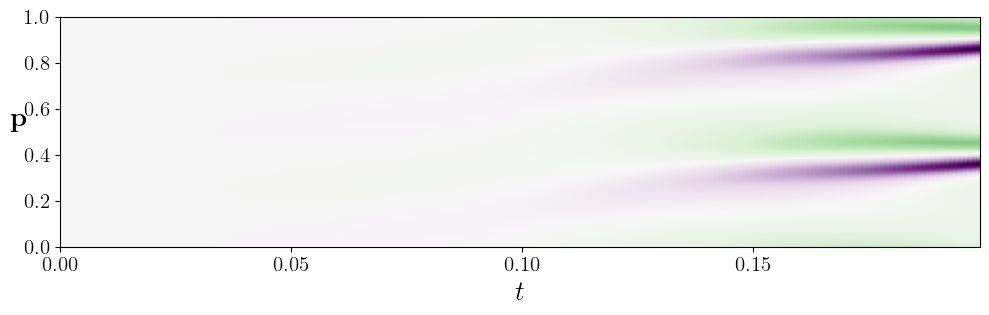

In [34]:
i = 16
param = params[i]

@unpack T, save_interval, Nx, Nθ= param
T = 0.2
    t_saves, fa_saves, fp_saves = load_pdes_pm(param,T; save_interval = save_interval, start_time = 0.)

mags = zeros(Nx, length(t_saves))
for (i, fa) in enumerate(fa_saves)
    mags[:,i] = mag_pm(fa; Nθ = Nθ)
end

using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    colmap = PyPlot.plt.cm.PRGn
    lim = max(maximum(mags),-minimum(mags))
    norm1 = matplotlib.colors.Normalize(vmin= -lim, vmax= lim) 
ax.matshow(mags; norm = norm1,  cmap = colmap, extent = [0., maximum(t_saves), 0., 1.])

rc("text", usetex=true)
    ax.set_aspect(maximum(t_saves)/4)

    ax.yaxis.set_ticks(0.:0.2:1.0)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.xaxis.set_tick_params(labelsize=15)
    ax.xaxis.tick_bottom()
    #ax.set_title(L"\Re{ \lambda_n^\mathrm{max}} = 0",fontsize=20)

    ax.set_xlabel(L"t",fontsize=20)
    ax.set_ylabel(L"\mathbf{p}", fontsize=20, rotation=0)


    #ax.set_title(L"\Re{ \lambda_n^\mathrm{max}} = 0",fontsize=20)
    # title = latexstring("\$ \\mathrm{Pe} = $(Pe)\$")
    # ax.set_title(title,fontsize=20)
    fig.tight_layout()

display(fig)



In [67]:
# set parameters
params = []
Pe = 7.5
pert = "pm_lin"
    T = 0.05
    save_interval = 0.001
    δ  = 1e-4
    Dx = 1. 
    Dθ = 400.0
    Nx = 2^10
    Nθ = 2
    δt = 1e-8
#
#load binodal values
name = "pm_pde_binodal_run_δ=$(δ)_l=$(1/sqrt(Dθ))"
#
filename = "/store/DAMTP/jm2386/Active_Lattice/data/binodal/Pe=$(Pe).jld2"
data = wload(filename)
@unpack Pe, γs, ϕ1s, ϕ2s, average_ϕs, χs = data
#create params
params = []
γ_length = length(γs)
n_lines = 40
interval = Int(round(γ_length/n_lines))
γs          = γs[interval:(interval):Int64(round(γ_length))]
average_ϕs  = average_ϕs[interval:(interval):Int64(round(γ_length))]
map(average_ϕs, γs) do ρ, γ
        χ = (1-γ*(1-ρ))/ρ
        param = pde_param_pm(; name = name, 
                                ρ = ρ, Pe = Pe, χ = χ, T = T, 
                                Dθ = Dθ, δt = δt, Nx = Nx, Nθ = Nθ, 
                                save_interval = save_interval, max_steps = 1e7,
                                pert = pert, δ = δ,
        )
        push!(params,param)
end

38-element Vector{Vector{Any}}:
 [Dict{String, Any}("λs" => 20.0:20.0:100.0, "T" => 0.05, "video_length" => 10000.0, "save_interval" => 0.001, "max_runs" => 6, "Pe" => 7.5, "λ_step" => 10.0, "δ" => 0.0001, "Nθ" => 2, "name" => "pm_pde_binodal_run_δ=0.0001_l=0.05"…), Dict{String, Any}("λs" => 20.0:20.0:100.0, "T" => 0.05, "video_length" => 10000.0, "save_interval" => 0.001, "max_runs" => 6, "Pe" => 7.5, "λ_step" => 10.0, "δ" => 0.0001, "Nθ" => 2, "name" => "pm_pde_binodal_run_δ=0.0001_l=0.05"…), Dict{String, Any}("λs" => 20.0:20.0:100.0, "T" => 0.05, "video_length" => 10000.0, "save_interval" => 0.001, "max_runs" => 6, "Pe" => 7.5, "λ_step" => 10.0, "δ" => 0.0001, "Nθ" => 2, "name" => "pm_pde_binodal_run_δ=0.0001_l=0.05"…), Dict{String, Any}("λs" => 20.0:20.0:100.0, "T" => 0.05, "video_length" => 10000.0, "save_interval" => 0.001, "max_runs" => 6, "Pe" => 7.5, "λ_step" => 10.0, "δ" => 0.0001, "Nθ" => 2, "name" => "pm_pde_binodal_run_δ=0.0001_l=0.05"…), Dict{String, Any}("λs" => 20.0:20.

0.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.05000000000567415

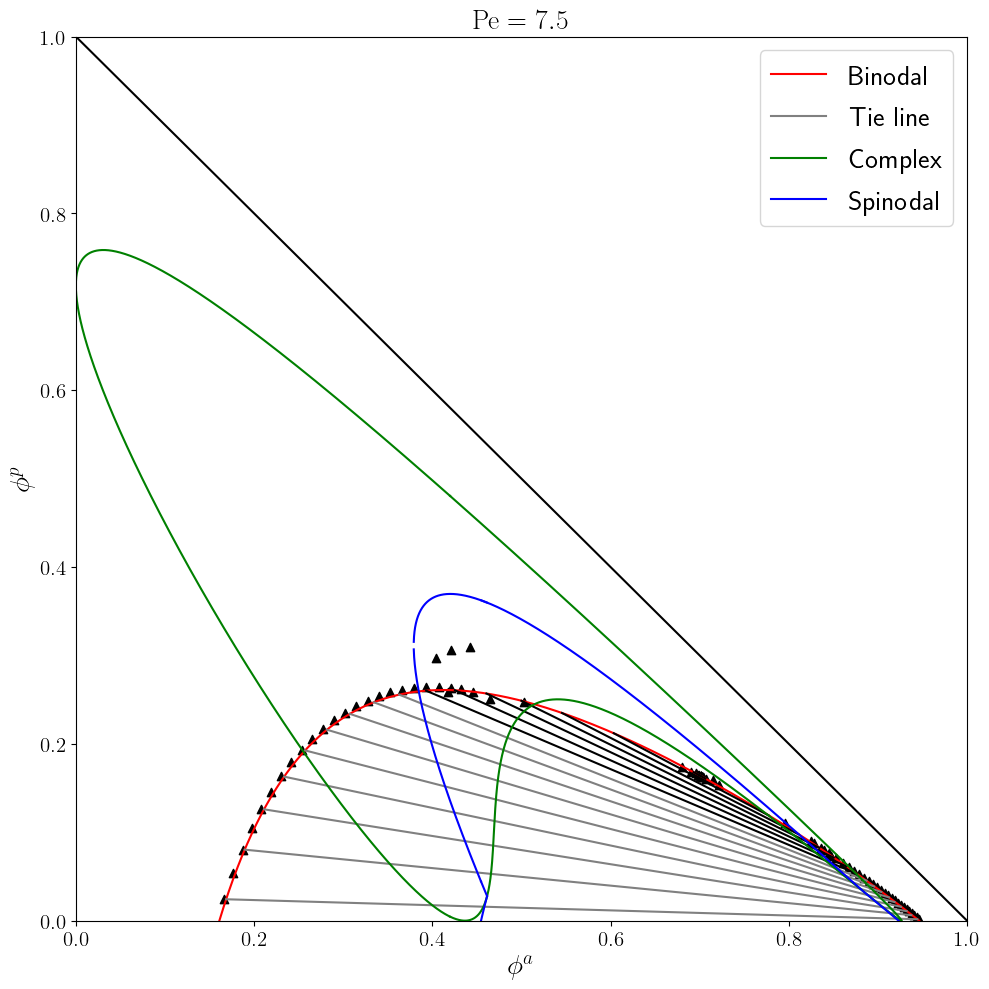

0.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.050000000005674150.05000000000567415

In [42]:
#scatter

ϕas = []
ϕps = []

for param in params
    @unpack save_interval, T, ρa, ρp = param

    t_saves, fa_saves, fp_saves = load_pdes_pm( param,T; save_interval = T);
    t, fa, fp = t_saves[2], fa_saves[2], fp_saves[2];

    ϕal = maximum( fa[:,1] + fa[:,2])
    ϕag = minimum( fa[:,1] + fa[:,2])
    ϕpl = minimum( fp )
    ϕpg = maximum( fp )

    push!(ϕas, ϕal)
    push!(ϕas, ϕag)
    push!(ϕps, ϕpl)
    push!(ϕps, ϕpg)
    print(t)
end

ax.scatter(ϕas, ϕps; color = "black", marker = "^", edgecolor = "black")
display(fig)

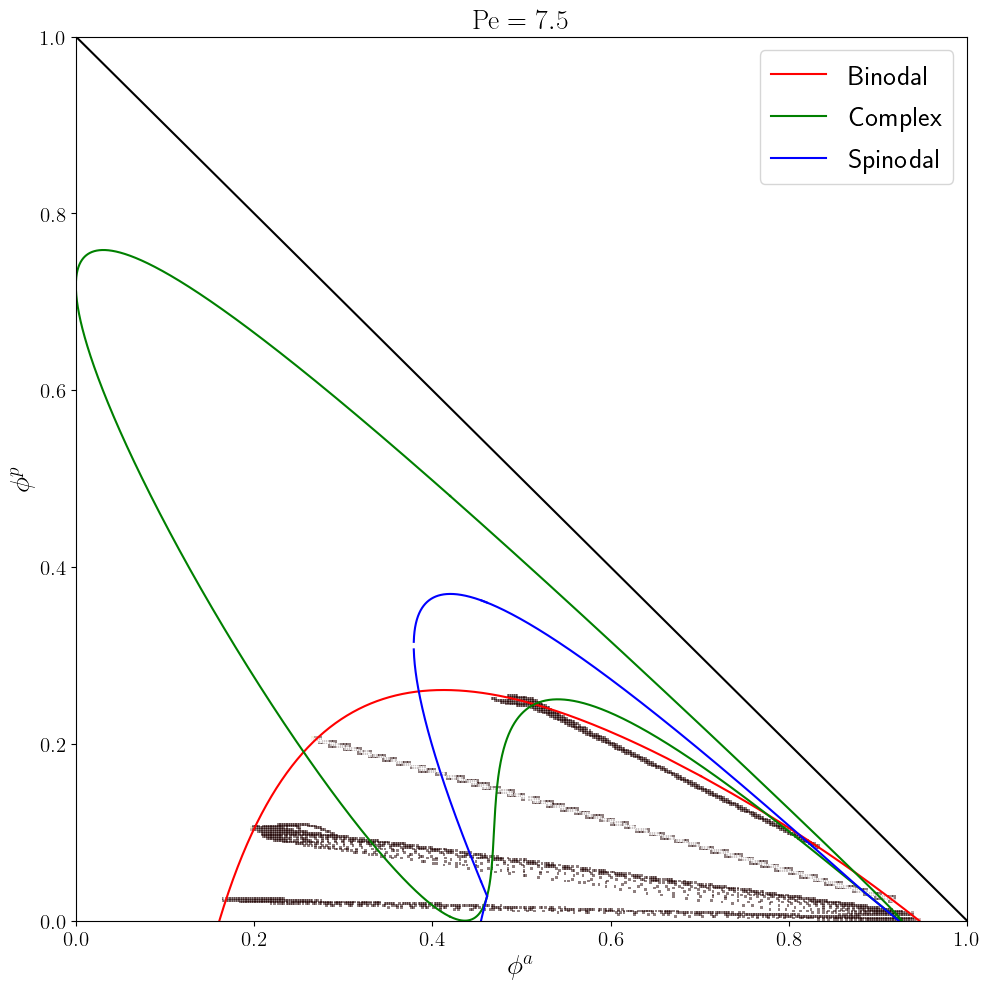

In [65]:
#for param in params[2:2:30]
    #load pde
    i = 10
    param = params[i]

    @unpack save_interval, T, ρa, ρp = param
    t_saves, fa_saves, fp_saves = load_pdes_pm( param,T; save_interval = save_interval);
    
    # plot densty curve
    # n = length(t_saves)
    # t, fa, fp = t_saves[n], fa_saves[n], fp_saves[n];
    # ρa = fa[:,1]+fa[:,2];
    # ax.plot(ρa,fp, color = "black", label = "Tie line", linestyle = ":")

    #plot heatmap of denstiies
    fps = vcat(fp_saves...)
    ρas = []
    for fa in fa_saves
        append!(ρas, fa[:,1]+fa[:,2])
    end

    hist = ax.hist2d(ρas, fps, 
        bins= 500, cmap="pink", alpha=0.5, cmin = 1, range = [0 1;0 1], #vmin = 0, vmax = 1
    )


# end
display(fig)

In [54]:
fps

50-element Vector{Any}:
 [0.2487569950989117, 0.2487569950989117, 0.2487569950989117, 0.2487569950989117, 0.2487569950989117, 0.2487569950989117, 0.2487569950989117, 0.2487569950989117, 0.2487569950989117, 0.2487569950989117  …  0.2487569950989117, 0.2487569950989117, 0.2487569950989117, 0.2487569950989117, 0.2487569950989117, 0.2487569950989117, 0.2487569950989117, 0.2487569950989117, 0.2487569950989117, 0.2487569950989117]
 [0.24875705769134787, 0.2487570581101515, 0.24875705894997097, 0.24875706021524008, 0.24875706191263278, 0.24875706405109077, 0.24875706664186298, 0.24875706969855105, 0.24875707323716717, 0.24875707727620208  …  0.24875707727620208, 0.24875707323716717, 0.24875706969855105, 0.24875706664186298, 0.24875706405109077, 0.24875706191263278, 0.24875706021524008, 0.24875705894997097, 0.2487570581101515, 0.24875705769134787]
 [0.24875682562724682, 0.24875682571062893, 0.24875682588640188, 0.2487568261726657, 0.24875682659677753, 0.24875682719560044, 0.24875682801583693, 

In [44]:
#save figure
name = "BinPde_Pe=$(Pe)"
    pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/active_passive_1d/$(name)";
    mkpath(pathname)
    filename = "/store/DAMTP/jm2386/Active_Lattice/plots/active_passive_1d/$(name)/BinPde.pdf";
    PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)

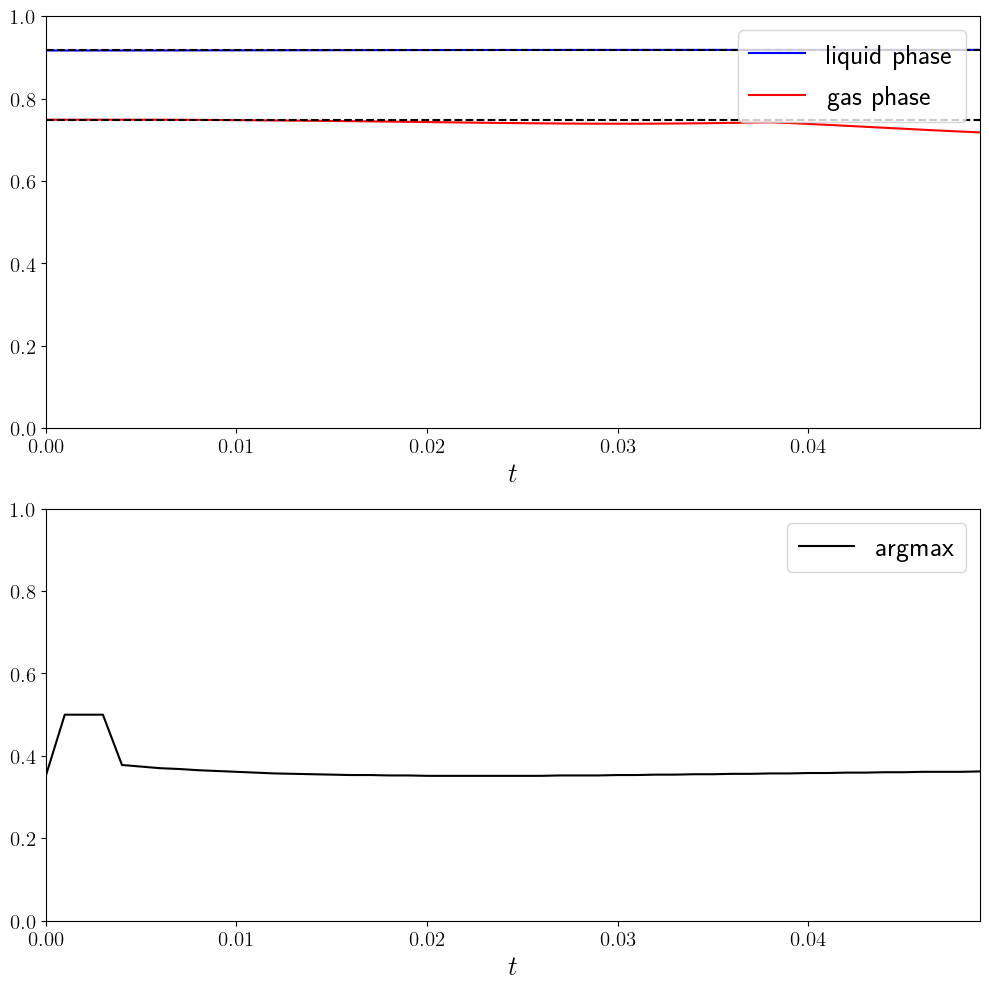

In [48]:

param = params[25]

function cal_rho_saves(fa, fp; Nθ = Nθ)
    return fp + sum(fa; dims =2)[:,1]
end

function time_plot_peak_density(param)
    # load solution

    @unpack save_interval, T, ρa, ρp = param

    t_saves, fa_saves, fp_saves = load_pdes_pm(param,T; save_interval = save_interval);

    if t_saves == []
        println("load error, no saves found")
    else
        ρ_saves = cal_rho_saves.(fa_saves, fp_saves; Nθ = Nθ);
        ρl_saves =  maximum.(ρ_saves);
        ρg_saves =  minimum.(ρ_saves);
        xmax_saves = argmax.(ρ_saves)/Nx;
        #plot binodal

        # parameters
        Pe = 7.5;
        γ = (1-ρa)/(1-ρa-ρp)
        initial_Δ = 1e-4;
        max_iter = 40;
        tol = 1e-16;
        atol = 1e-16;
        rho_max = (1-10e-20);

        find_sol, lower_limits, upper_limits = colapse_sol_interval(;Pe = Pe, γ = γ, rho_max = rho_max, initial_Δ = initial_Δ, max_iter = max_iter, tol = tol, atol = atol);
        ϕg = lower_limits[1]
        ϕl = upper_limits[1]

        ax = axs[1]
            N = length(t_saves)
            liquid = ax.plot(t_saves, ρl_saves, color = "blue", label = "liquid phase")
            gas = ax.plot(t_saves, ρg_saves, color = "red", label = "gas phase")
            binod_liquid = ax.plot(t_saves, ϕl*ones(N), color = "black", linestyle = "--", label = "_liquid phase")
            binod_gas = ax.plot(t_saves, ϕg*ones(N), color = "black",linestyle = "--", label = "_gas phase")
            #plot phase
            ax = axs[2]
        ax.plot(t_saves, xmax_saves, color = "black", label = "argmax")

        #axs settings
        for ax in axs
            #ax.yaxis.set_ticks(ytic)
            axlim = [0, maximum(t_saves), 0, 1]
            #axlim = [0.4, 0.45, 0, 0.1]
            ax.xaxis.set_tick_params(labelsize=15)
            #ax.xaxis.tick_bottom(t_saves)
            ax.yaxis.set_tick_params(labelsize=15)
            ax.axis(axlim)
            #ax.set_title(L"\Re{ \lambda_n^\mathrm{max}} = 0",fontsize=20)
            ax.set_xlabel(L"t",fontsize=20)
            #ax.set_ylabel(L"\phi^p", fontsize=20)
            ax.legend(loc = "upper right", fontsize=20)
            #ax.set_aspect(0.25*Δρ/ΔPe)
        end
        fig.tight_layout()
    end
end

using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
fig, axs = plt.subplots(2, 1, figsize=(10,10))
time_plot_peak_density(param)
display(fig)

In [49]:
@unpack ρa, ρp, Pe = param
    γ = (1-ρa)/(1-ρa-ρp)
    initial_Δ = 1e-4;
    max_iter = 40;
    tol = 1e-16;
    atol = 1e-16;
    rho_max = (1-10e-20);

    find_sol, lower_limits, upper_limits = colapse_sol_interval(;Pe = Pe, γ = γ, rho_max = rho_max, initial_Δ = initial_Δ, max_iter = max_iter, tol = tol, atol = atol);
ϕg = lower_limits[1]
ϕl = upper_limits[1]

make_phase_video_pm(param; skip_factor = 1, ϕg = ϕg, ϕl = ϕl)